In [ ]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

pd.set_option('display.max_columns', None)

In [ ]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
print(train_data.shape)
print(test_data.shape)

(614, 13)
(367, 12)


In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


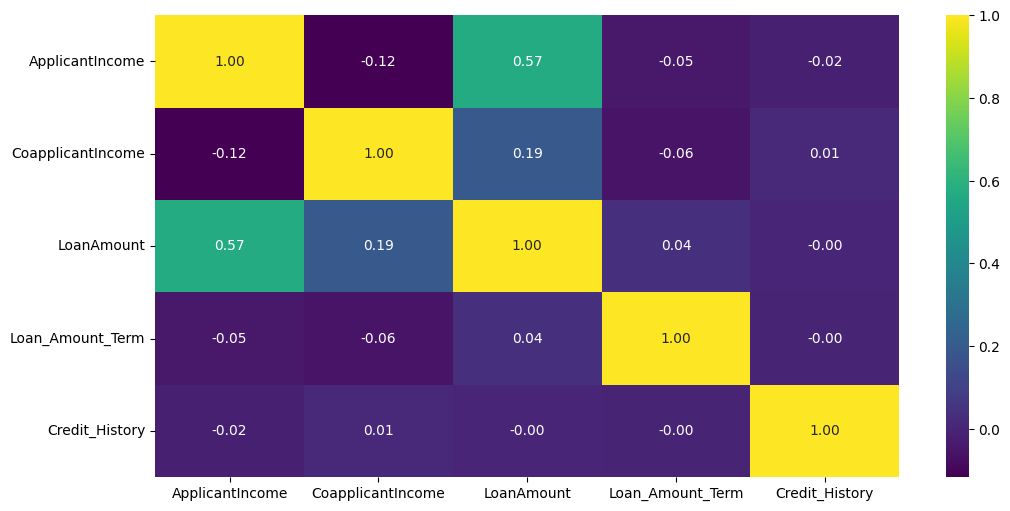

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from the DataFrame
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Optional: Handle missing values (fill NaNs with the median of each column)
numeric_data = numeric_data.fillna(numeric_data.median())

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt='.2f')
plt.show()


In [ ]:
train_data['Loan_Status'] = train_data['Loan_Status'].map({'N' : 0, 'Y' : 1})

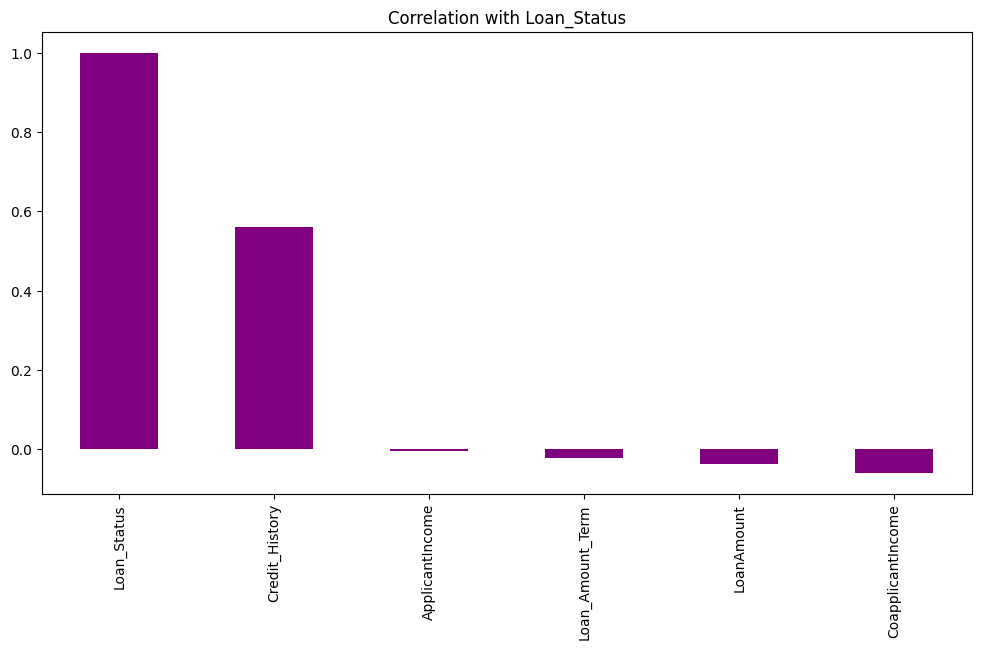

In [ ]:
import matplotlib.pyplot as plt

# Filter numeric columns only
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlations with 'Loan_Status', excluding 'Loan_Status' itself
plt.figure(figsize=(12, 6))
corr_matrix['Loan_Status'].sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Correlation with Loan_Status')
plt.show()


# Exploratory Data Analysis

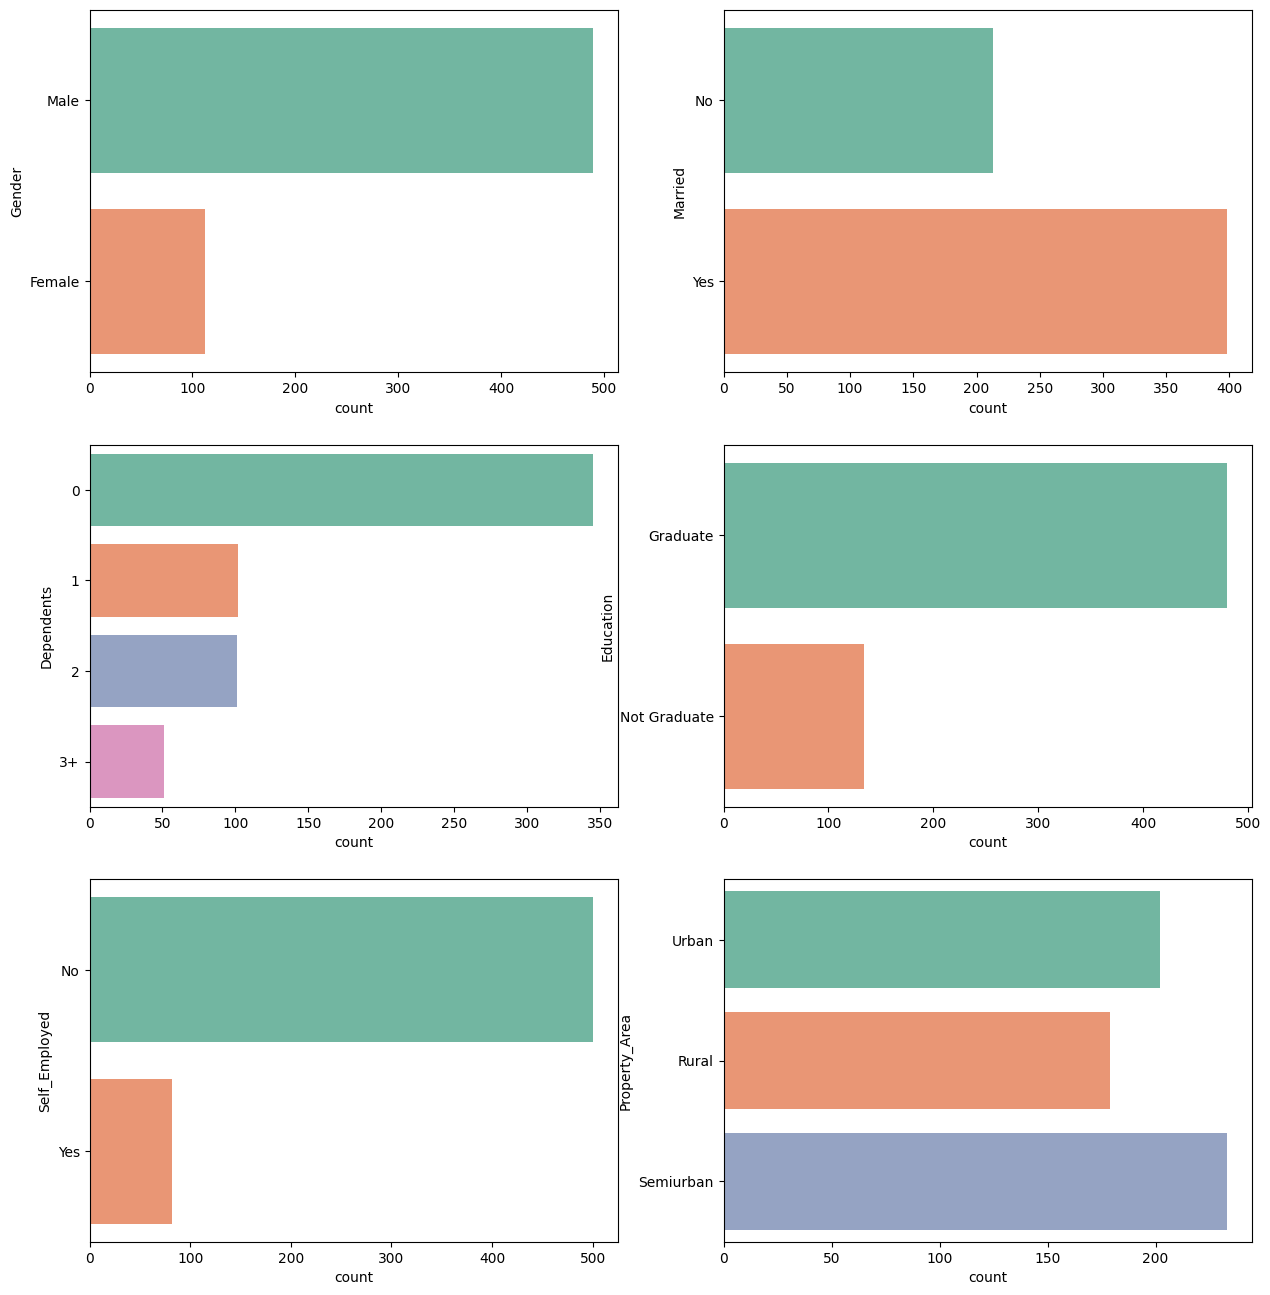

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(train_data['Gender'], ax=ax[0,0], palette='Set2')
_=sns.countplot(train_data['Married'], ax=ax[0,1], palette='Set2')
_=sns.countplot(train_data['Dependents'], ax=ax[1,0], palette='Set2')
_=sns.countplot(train_data['Education'], ax=ax[1,1], palette='Set2')
_=sns.countplot(train_data['Self_Employed'], ax=ax[2,0], palette='Set2')
_=sns.countplot(train_data['Property_Area'], ax=ax[2,1], palette='Set2')

<Axes: ylabel='count'>

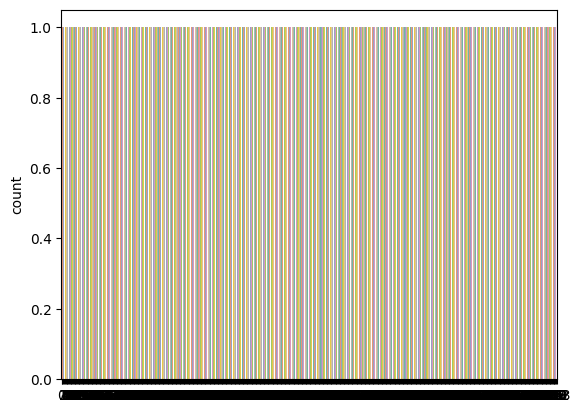

In [ ]:
sns.countplot(train_data['Loan_Status'], palette='Set2')

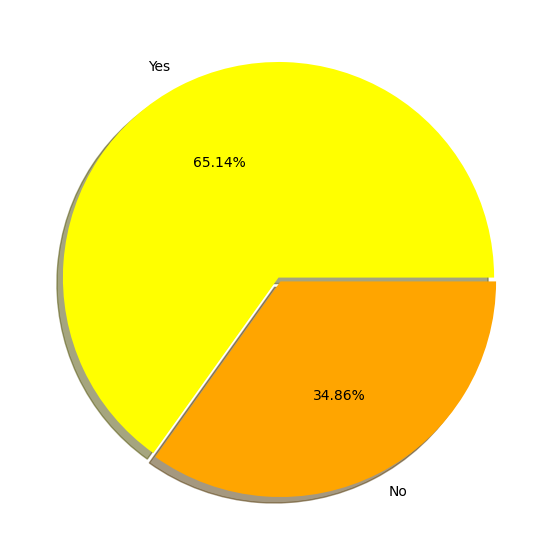

In [ ]:
size = train_data['Married'].value_counts()
labels = ['Yes', 'No']
color = ['yellow', 'orange']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

In [ ]:
gender = train_data[['Gender', 'LoanAmount']].groupby("Gender").mean()
gender = pd.DataFrame(gender)
gender

,LoanAmount
Gender,
Female,126.70
Male,149.27


In [ ]:
Education = train_data[['Education', 'LoanAmount']].groupby("Education").mean()
Education = pd.DataFrame(Education)
Education

,LoanAmount
Education,
Graduate,154.06
Not Graduate,118.41


# **Checking Null Values**

In [ ]:
train_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
test_data.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
# Since Loan_ID is needed for sample_submission hence I am replacing 'LP00' with

train_data['Loan_ID'] = train_data['Loan_ID'].str.replace('LP00', '')
test_data['Loan_ID'] = test_data['Loan_ID'].str.replace('LP00', '')

In [ ]:
# Counting the values for categorical columns

train_data['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [ ]:
train_data['Married'].value_counts()

,count
Married,
Yes,398
No,213


In [ ]:
train_data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
train_data['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [ ]:
train_data['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


# Handle the missing data

In [ ]:
train_data['Gender'] = train_data['Gender'].fillna('Male')
train_data['Married'] = train_data['Married'].fillna('Yes')
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna('No')
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0])
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

In [ ]:
test_data['Gender'] = test_data['Gender'].fillna('Male')
test_data['Dependents'] = test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed'] = test_data['Self_Employed'].fillna('No')
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0])
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])

# Change the datatypes of certain columns

In [ ]:
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].astype('int64')
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].astype('int64')

In [ ]:
# Removing the '+' sign from Dependents column
train_data['Dependents'] = train_data['Dependents'].str.rstrip('+')
test_data['Dependents'] = test_data['Dependents'].str.rstrip('+')

In [ ]:
train_data['Dependents'] = train_data['Dependents'].astype('int64')
test_data['Dependents'] = test_data['Dependents'].astype('int64')

# Imputing categorical columns

In [ ]:
train_data['Gender'] = train_data['Gender'].map({'Male': 1, 'Female': 0})
train_data['Married'] = train_data['Married'].map({'No' : 0, 'Yes': 1})
train_data['Education'] = train_data['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train_data['Self_Employed'] = train_data['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [ ]:
test_data['Gender'] = test_data['Gender'].map({'Male': 1, 'Female': 0})
test_data['Married'] = test_data['Married'].map({'No' : 0, 'Yes': 1})
test_data['Education'] = test_data['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test_data['Self_Employed'] = test_data['Self_Employed'].map({'No' : 0, 'Yes' : 1})

# Creating dummy variables for Property column

In [ ]:
property_area = pd.get_dummies(train_data['Property_Area'], prefix='Property_Area')
train_data = pd.concat([train_data, property_area], axis = 1)
train_data = train_data.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(test_data['Property_Area'], prefix='Property_Area')
test_data = pd.concat([test_data, property_area], axis = 1)
test_data = test_data.drop('Property_Area', axis = 1)

# Scaling the data

In [ ]:
scaler = StandardScaler()

train_data['Loan_ID'] = scaler.fit_transform(train_data['Loan_ID'].values.reshape(-1, 1))
test_data['Loan_ID'] = scaler.transform(test_data['Loan_ID'].values.reshape(-1, 1))

In [ ]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
for col in numerical_cols:
    train_data[col] = scaler.fit_transform(train_data[col].values.reshape(-1, 1))
    test_data[col] = scaler.transform(test_data[col].values.reshape(-1, 1))

# Splitting the data

In [ ]:
X = train_data.drop('Loan_Status', axis = 1)
y = train_data['Loan_Status']
X_test = test_data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Building Models

In [ ]:
lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:01<00:00, 17.02it/s]

[LightGBM] [Info] Number of positive: 302, number of negative: 127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703963 -> initscore=0.866240
[LightGBM] [Info] Start training from score 0.866240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
model.sort_values('Accuracy', ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.78,0.70,0.70,0.76,0.02
RidgeClassifier,0.78,0.70,0.70,0.76,0.02
SVC,0.78,0.70,0.70,0.75,0.03
NuSVC,0.78,0.70,0.70,0.75,0.03
CalibratedClassifierCV,0.78,0.70,0.70,0.76,0.06
LogisticRegression,0.78,0.70,0.70,0.76,0.02
NearestCentroid,0.78,0.70,0.70,0.76,0.02
LinearSVC,0.78,0.70,0.70,0.76,0.07
RidgeClassifierCV,0.78,0.70,0.70,0.76,0.03


In [ ]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['AdaBoostClassifier ', AdaBoostClassifier()],
        ['ExtraTreesClassifier ', ExtraTreesClassifier()],
        ['XGBClassifier ', XGBClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()],
         ['LGBMClassifier ', LGBMClassifier()]]

In [ ]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    print(name, accuracy_score(y_val, prediction))

LogisticRegression  0.7837837837837838
DecisionTreeClassifier  0.7243243243243244
RandomForestClassifier  0.7945945945945946
AdaBoostClassifier  0.772972972972973
ExtraTreesClassifier  0.772972972972973
XGBClassifier  0.7621621621621621
GradientBoostingClassifier  0.7243243243243244
KNeighborsClassifier  0.6648648648648648
SVC  0.7837837837837838
[LightGBM] [Info] Number of positive: 302, number of negative: 127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703963 -> initscore=0.866240
[LightGBM] [Info] Start training from score 0.866240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

Selecting LogisticRegresssion, SVC, AdaBoostClassifier, RandomForestClassifier for Hyperparameter Tuning based the accuracy scores

# Hyperparameter Tuning

In [ ]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },
    'AdaBoostClassifier' : {
        'model' : AdaBoostClassifier(),
        'param' : {
            'n_estimators' : [100, 300, 500, 700, 1000, 2100],
            'learning_rate' : [0.1, 0.3, 0.5, 0.7]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    }
}

In [ ]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.82,"LogisticRegression(C=0.3, max_iter=2100, penal..."
1,SVC,0.82,"SVC(C=0.9, degree=5, kernel='linear')"
3,RandomForestClassifier,0.82,"(DecisionTreeClassifier(max_depth=3, max_featu..."
2,AdaBoostClassifier,0.81,"(DecisionTreeClassifier(max_depth=1, random_st..."
4,SGDClassifier,0.79,"SGDClassifier(max_iter=2100, penalty='l1')"


LogisticRegression is giving the the best accuracy

In [ ]:
final['estimator'].iloc[0]

LogisticRegression(C=0.3, max_iter=2100, penalty='l1', solver='liblinear')

In [ ]:
# Using the best parameters of LogisticRegression for building the final model

classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_val)

In [ ]:
# Predicting the test data

pred = classifier.predict(X_test)

# Making the final submission

In [ ]:
test_df = pd.read_csv('test_data.csv')
submission = pd.read_csv('sample_submission_49d68Cx.csv')

submission['Loan_ID'] = test_df['Loan_ID']

In [ ]:
submission['Loan_Status'] = pred
submission.to_csv('sample_submission.csv', index=False)

In [ ]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [ ]:
submission.to_csv('sample_submission.csv', index=False)

### Test Score: 0.77